# [**Arrêt anticipé du Gradient Boosting**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/1_11_ensembles/plot_gradient_boosting_early_stopping.ipynb)<br/>([_Early stopping of Gradient Boosting_](https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_early_stopping.html))

Le Gradient Boosting est une technique d'ensemble où plusieurs apprenants faibles (arbres de régression) sont combinés pour former un modèle unique et puissant, de manière itérative.

La prise en charge de l'arrêt anticipé dans le Gradient Boosting nous permet de trouver le nombre minimal d'itérations nécessaire pour construire un modèle qui généralise bien sur des données invisibles.

Le concept de l'arrêt anticipé est simple. Nous spécifions une `validation_fraction` qui représente la fraction de l'ensemble de données entier qui sera réservée à des fins de validation pour évaluer la perte de validation du modèle. Le modèle de Gradient Boosting est entraîné en utilisant l'ensemble d'entraînement et évalué à l'aide de l'ensemble de validation. À chaque étape supplémentaire de l'arbre de régression ajoutée, l'ensemble de validation est utilisé pour évaluer le modèle. Cela se poursuit jusqu'à ce que les scores du modèle dans les dernières `n_iter_no_change` étapes n'augmentent pas d'au moins `tol`. Après cela, le modèle est considéré comme convergent et l'ajout ultérieur d'étapes est "arrêté prématurément".

Le nombre d'étapes du modèle final est disponible dans l'attribut `n_estimators_`.

Cet exemple illustre comment l'arrêt anticipé peut être utilisé dans le modèle [**`GradientBoostingClassifier`**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier) pour atteindre une précision presque similaire par rapport à un modèle construit sans arrêt anticipé en utilisant beaucoup moins d'estimateurs. Cela peut réduire considérablement le temps d'entraînement, l'utilisation de la mémoire et la latence de prédiction.

In [1]:
# Authors: Vighnesh Birodkar <vighneshbirodkar@nyu.edu>
#          Raghav RV <rvraghav93@gmail.com>
# License: BSD 3 clause

import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, ensemble
from sklearn.model_selection import train_test_split

data_list = [
    datasets.load_iris(return_X_y=True),
    datasets.make_classification(n_samples=800, random_state=0),
    datasets.make_hastie_10_2(n_samples=2000, random_state=0),
]
names = ["Iris Data", "Classification Data", "Hastie Data"]

n_gb = []
score_gb = []
time_gb = []
n_gbes = []
score_gbes = []
time_gbes = []

n_estimators = 200

for X, y in data_list:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=0
    )

    # We specify that if the scores don't improve by at least 0.01 for the last
    # 10 stages, stop fitting additional stages
    gbes = ensemble.GradientBoostingClassifier(
        n_estimators=n_estimators,
        validation_fraction=0.2,
        n_iter_no_change=5,
        tol=0.01,
        random_state=0,
    )
    gb = ensemble.GradientBoostingClassifier(n_estimators=n_estimators, random_state=0)
    start = time.time()
    gb.fit(X_train, y_train)
    time_gb.append(time.time() - start)

    start = time.time()
    gbes.fit(X_train, y_train)
    time_gbes.append(time.time() - start)

    score_gb.append(gb.score(X_test, y_test))
    score_gbes.append(gbes.score(X_test, y_test))

    n_gb.append(gb.n_estimators_)
    n_gbes.append(gbes.n_estimators_)

bar_width = 0.2
n = len(data_list)
index = np.arange(0, n * bar_width, bar_width) * 2.5
index = index[0:n]

# Comparer les scores avec et sans arrêt anticipé

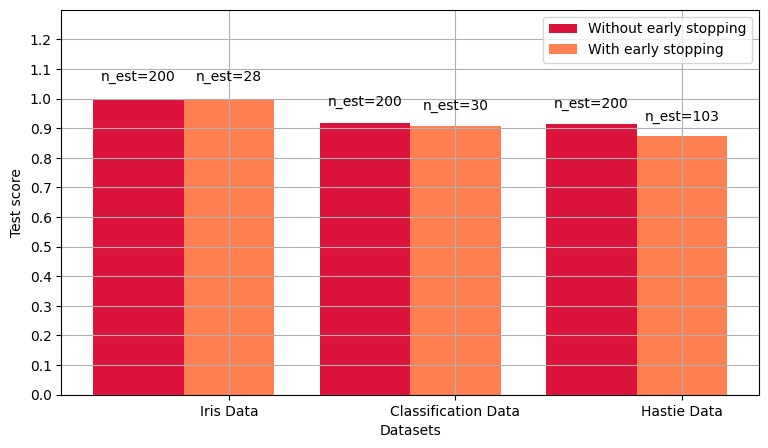

In [2]:
plt.figure(figsize=(9, 5))

bar1 = plt.bar(
    index, score_gb, bar_width, label="Without early stopping", color="crimson"
)
bar2 = plt.bar(
    index + bar_width, score_gbes, bar_width, label="With early stopping", color="coral"
)

plt.xticks(index + bar_width, names)
plt.yticks(np.arange(0, 1.3, 0.1))


def autolabel(rects, n_estimators):
    """
    Attach a text label above each bar displaying n_estimators of each model
    """
    for i, rect in enumerate(rects):
        plt.text(
            rect.get_x() + rect.get_width() / 2.0,
            1.05 * rect.get_height(),
            "n_est=%d" % n_estimators[i],
            ha="center",
            va="bottom",
        )


autolabel(bar1, n_gb)
autolabel(bar2, n_gbes)

plt.ylim([0, 1.3])
plt.legend(loc="best")
plt.grid(True)

plt.xlabel("Datasets")
plt.ylabel("Test score")

plt.show()

# Comparer les temps d'ajustement avec et sans arrêt anticipé

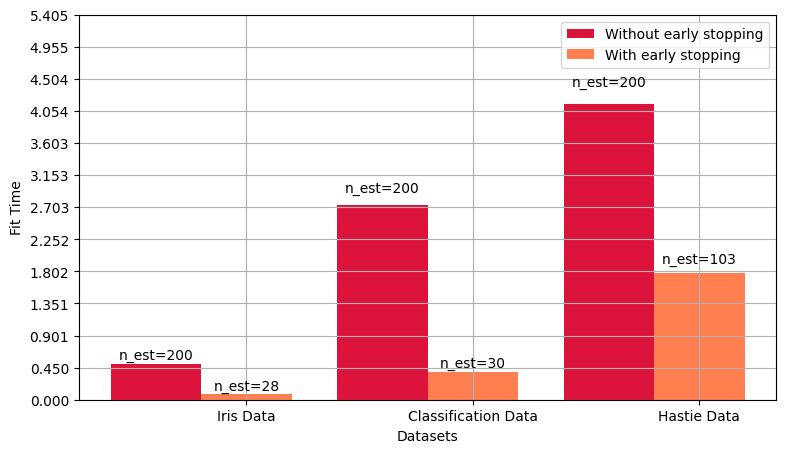

In [3]:
plt.figure(figsize=(9, 5))

bar1 = plt.bar(
    index, time_gb, bar_width, label="Without early stopping", color="crimson"
)
bar2 = plt.bar(
    index + bar_width, time_gbes, bar_width, label="With early stopping", color="coral"
)

max_y = np.amax(np.maximum(time_gb, time_gbes))

plt.xticks(index + bar_width, names)
plt.yticks(np.linspace(0, 1.3 * max_y, 13))

autolabel(bar1, n_gb)
autolabel(bar2, n_gbes)

plt.ylim([0, 1.3 * max_y])
plt.legend(loc="best")
plt.grid(True)

plt.xlabel("Datasets")
plt.ylabel("Fit Time")

plt.show()